<a href="https://colab.research.google.com/github/LorenzoRappuoli/data_analysis_python-/blob/main/01_Analisi_esplorativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from random import sample
import plotly.figure_factory as ff
import statsmodels.api as sm
import plotly.graph_objects as go
import random


# **Analisi esplorativa dei dati**


## ***Numeric***:
Data that are expressed on a numeric scale.
- Continuous:
Data that can take on any value in an interval. (Synonyms: interval, float,
numeric)
- Discrete:
Data that can take on only integer values, such as counts. (Synonyms: integer,
count)

## ***Categorical***:
Data that can take on only a specific set of values representing a set of possible
categories. (Synonyms: enums, enumerated, factors, nominal)
- Binary:
A special case of categorical data with just two categories of values, e.g., 0/1,
true/false. (Synonyms: dichotomous, logical, indicator, boolean)
- Ordinal:
Categorical data that has an explicit ordering. (Synonym: ordered factor)

The typical frame of reference for an analysis in data science is a
**rectangular data**
object, like a spreadsheet or database table.
Rectangular data is the general term for a two-dimensional matrix with rows indicating
records (cases) and columns indicating features (variables); data frame is the specific
format in R and Python.

**Feature:**
A column within a table is commonly referred to as a feature.


**Records:**
A row within a table is commonly referred to as a record.

---
---
**Locazione**

In [ ]:
state = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/state.csv')
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


## **Indici di centralità**

### **Media**:
The mean is the
sum of all values divided by the number of values.
The basic metric for location is the mean, but it can be sensitive to extreme
values (outlier).

In [ ]:
np.mean(state[['Population']])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Population    6162876.3
dtype: float64

### **Media trimmerata**:
A variation of the mean is a trimmed mean, which you calculate by dropping a fixed
number of sorted values at each end and then taking an average of the remaining values. **A trimmed mean eliminates the influence of extreme values**

In [ ]:
stats.trim_mean(state[['Population']], 0.1)

array([4783697.125])

### **Media pesata**:
Another type of mean is a weighted mean, which you calculate by multiplying each
data value xi by a user-specified weight wi and dividing their sum by the sum of the
weights.

There are two main motivations for using a weighted mean:
- **Some values are intrinsically more variable than others**, and highly variable
observations are given a lower weight. For example, if we are taking the average
from multiple sensors and one of the sensors is less accurate, then we might
downweight the data from that sensor.
- **The data collected does not equally represent the different groups that we are
interested in measuring**. For example, because of the way an online experiment
was conducted, we may not have a set of data that accurately reflects all groups in
the user base. To correct that, we can give a higher weight to the values from the
groups that were underrepresented.

In [ ]:
np.average(state[['Murder.Rate']],weights=state[['Population']])

4.445833981123393

### **Mediana**:

The median is the middle number on a sorted list of the data. If there is an even number
of data values, the middle value is one that is not actually in the data set, but
rather the average of the two values that divide the sorted data into upper and lower
halves. Compared to the mean, which uses all observations, the median depends only
on the values in the center of the sorted data. While this might seem to be a disadvantage,
**since the mean is much more sensitive to the data, there are many instances in
which the median is a better metric for location**. Let’s say we want to look at typical
household incomes in neighborhoods around Lake Washington in Seattle. In comparing
the Medina neighborhood to the Windermere neighborhood, using the mean
would produce very different results because Bill Gates lives in Medina. If we use the
median, it won’t matter how rich Bill Gates is—the position of the middle observation
will remain the same.

In [ ]:
np.median(state[['Population']])

4436369.5

### **Outliers**:
The median is referred to as a robust estimate of location since it is not influenced by
outliers (extreme cases) that could skew the results. An outlier is any value that is very
distant from the other values in a data set.When outliers are the
result of bad data, the mean will result in a poor estimate of location, while the
median will still be valid. In any case, outliers should be identified and are usually
worthy of further investigation.

---
---
## **Stima della variabilità**

Location is just one dimension in summarizing a feature. A second dimension, variability,
also referred to as dispersion, measures whether the data values are tightly clustered
or spread out.

- **Deviations**
The difference between the observed values and the estimate of location.
Synonyms
errors, residuals

- **Variance**
The sum of squared deviations from the mean divided by n – 1 where n is the
number of data values.

- **Standard deviation**
The square root of the variance.

- **Mean absolute deviation**
The mean of the absolute values of the deviations from the mean.
Synonyms
l1-norm, Manhattan norm

- **Median absolute deviation from the median**
The median of the absolute values of the deviations from the median.

- **Range**
The difference between the largest and the smallest value in a data set.

- **Order statistics**
Metrics based on the data values sorted from smallest to biggest.
Synonym
ranks

- **Percentile**
The value such that P percent of the values take on this value or less and (100–P)
percent take on this value or more.
Synonym
quantile

- **Interquartile range**
The difference between the 75th percentile and the 25th percentile.
Synonym
IQR

The most widely used estimates of variation are based on the differences, or deviations,
between the estimate of location and the observed data. These deviations tell us how dispersed the
data is around the central value.

### **Varianza**:
The variance is an average of the squared
deviations, and the standard deviation is the square root of the variance

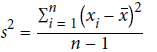

In [ ]:
np.var(state[['Population']])

Population    4.596036e+13
dtype: float64

### **Deviazione standard**:
The standard deviation is much easier to interpret than the variance since it is on the
same scale as the original data

In [ ]:
np.std(state[['Population']])

Population    6.779407e+06
dtype: float64

### ***Deviazione assoluta dalla media***

A simple approach is to take the average of the absolute values of the
deviations from the mean


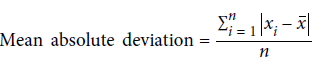

In [ ]:
state[['Population']].mad()

Population    4450933.356
dtype: float64

### **Deviazione mediana assoluta dall'intervallo mediano**:
Neither the variance, the standard deviation, nor the mean absolute deviation is
robust to outliers and extreme values. The variance and standard deviation
are especially sensitive to outliers since they are based on the squared deviations.
A robust estimate of variability is the median absolute deviation from the median or
MAD

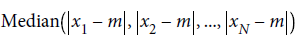

where m is the median

In [ ]:
np.median(np.abs(state[['Population']]-np.median(state[['Population']])))

2596702.0

### **Stime basate sui percentili**

A different approach to estimating dispersion is based on looking at the spread of the
sorted data. Statistics based on sorted (ranked) data are referred to as *order statistics*.
The most basic measure is the range: the difference between the largest and smallest
numbers.

The minimum and maximum values themselves are useful to know and are
helpful in identifying outliers, but the range is extremely sensitive to outliers and not
very useful as a general measure of dispersion in the data.
To avoid the sensitivity to outliers, we can look at the range of the data after dropping
values from each end.

In a data set, the **Pth percentile is a value such that at least P percent
of the values take on this value or less and at least (100 – P) percent of the values**
take on this value or more. For example, to find the 80th percentile, sort the data.
Then, starting with the smallest value, proceed 80 percent of the way to the largest
value.

If we have an even number of data (n is even), then the percentile is
ambiguous under the preceding definition. In fact, we could take
on any value between the order statistics x j and x j + 1 where j
satisfies:

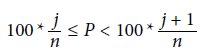



In [ ]:
print(np.percentile(state[['Population']], 25))
print(np.percentile(state[['Population']], 40))
print(np.percentile(state[['Population']], 50)) # è anche la mediana
print(np.percentile(state[['Population']], 60))

1833004.25
3014731.8000000003
4436369.5
5457149.399999999


### **Interquartile range (or IQR)**
A common measurement of variability is the difference between the 25th percentile
and the 75th percentile, called the **interquartile range (or IQR)**.


Il vantaggio principale dell'interquartile range (IQR) è che è una misura di dispersione che è meno influenzata dagli outliers rispetto ad altre misure di dispersione, come la varianza o lo scarto quadratico medio. Gli outliers sono dati che si trovano molto al di fuori della distribuzione dei dati. Possono essere dovuti a errori di misurazione o a fattori casuali.

L'IQR è calcolato come la differenza tra il terzo quartile (Q3) e il primo quartile (Q1). Il terzo quartile è il valore che divide i dati in due parti uguali, con il 75% dei dati al di sotto e il 25% al di sopra. Il primo quartile è il valore che divide i dati in due parti uguali, con il 25% dei dati al di sotto e il 75% al di sopra.

In pratica, l'IQR è spesso utilizzato per confrontare la dispersione dei dati in due o più gruppi. Ad esempio, si può utilizzare l'IQR per confrontare la dispersione delle misure di altezza in uomini e donne. Se l'IQR è più alto negli uomini che nelle donne, significa che la distribuzione delle altezze è più ampia negli uomini che nelle donne.

In [ ]:
np.percentile(state[['Population']], 75) - np.percentile(state[['Population']], 25) # quindi è la distanza tra il 25esimo percentile e il 75esimo

4847308.0

---
---
## **Esplorare la distribuzione dei dati (numerici)**

- **Boxplot**
A plot introduced by Tukey as a quick way to visualize the distribution of data.
Synonym
box and whiskers plot

- **Frequency table**
A tally of the count of numeric data values that fall into a set of intervals (bins).

- **Histogram**
A plot of the frequency table with the bins on the x-axis and the count (or proportion)
on the y-axis. While visually similar, bar charts should not be confused
with histograms.

- **Density plot**
A smoothed version of the histogram, often based on a kernel density estimate.

In [ ]:
# percentili

state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

### *Boxplot*:
are based on percentiles and give a
quick way to visualize the distribution of data.

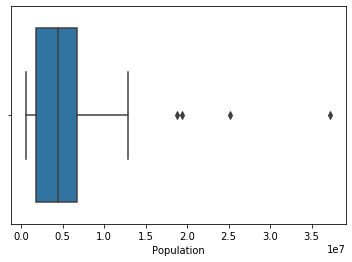

In [ ]:
sns.boxplot(x=state['Population'])
plt.show()

### *Frequency Tables and Histograms*:
a frequency table of a variable divides up the variable range into equally spaced segments
and tells us how many values fall within each segment. It is important to include the empty bins; the fact that there are no values
in those bins is useful information. It can also be useful to experiment with different
bin sizes

In [ ]:
binnedPopulation = pd.cut(state['Population'], 10) # creo 10 classi
binnedPopulation.value_counts() # conto tutti i valori nelle classi

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

A **histogram** is a way to visualize a frequency table, with bins on the x-axis and the
data count on the y-axis.

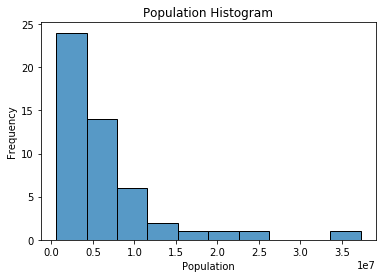

In [ ]:
sns.histplot(state['Population'], bins=10, kde=False)
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Population Histogram')
plt.show()

### **Density Plots and Estimates**:
A density plot can be thought of as a smoothed histogram,
although it is typically computed directly from the data through a kernel density estimate

 È simile a un istogramma, ma invece di utilizzare barre per rappresentare la frequenza dei dati, utilizza una curva continua per rappresentare la densità dei dati.

La densità di una variabile è la probabilità che un dato casuale estratto dalla distribuzione della variabile assuma un determinato valore. Può essere calcolata utilizzando una varietà di metodi, tra cui la stima kernel.
Immagine di Grafico di densità di un insieme di dati normali

Text(0.5, 0, 'Murder Rate (per 100,000)')

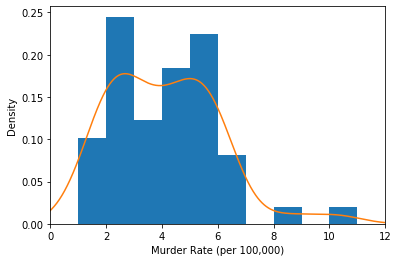

In [ ]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

### Joint Grid

The JointGrid is a powerful tool for visualizing the relationship between two variables. It allows you to create a grid of plots that show the bivariate relationship between the two variables, as well as the marginal distributions of each variable. This makes it a versatile tool for exploring a variety of data relationships.

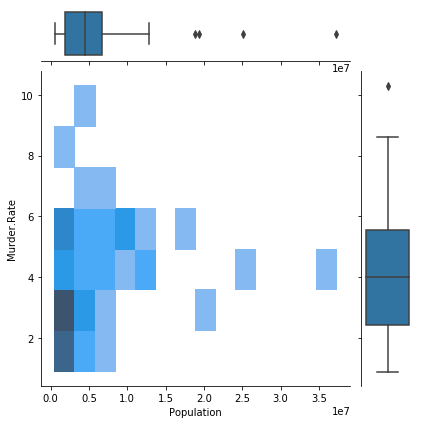

In [ ]:
g = sns.JointGrid(data=state, x="Population", y="Murder.Rate")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

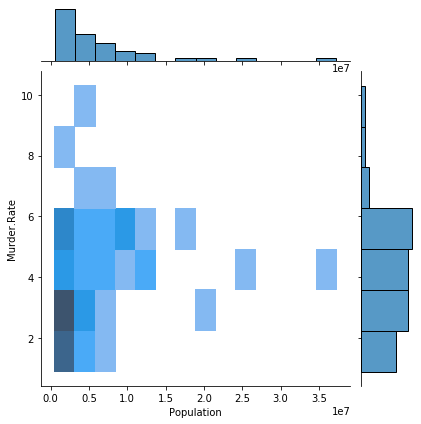

In [ ]:
g = sns.JointGrid(data=state, x="Population", y="Murder.Rate")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.histplot)

---
---
## **Esplorare dati binomiale e categorici**

- **Mode**
The most commonly occurring category or value in a data set.

- **Expected value**
When the categories can be associated with a numeric value, this gives an average
value based on a category’s probability of occurrence.

- **Bar charts**
The frequency or proportion for each category plotted as bars.

- **Pie charts**
The frequency or proportion for each category plotted as wedges in a pie.

In [ ]:
dfw = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/dfw_airline.csv')
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


### **Bar chart**:
Bar charts, seen often in the popular press, are a common visual tool for displaying a
single categorical variable. Categories are listed on the x-axis, and frequencies or proportions
on the y-axis.

In [ ]:
dfw_transpose = dfw.transpose().reset_index()
dfw_transpose.rename(columns={'index': 'Cause', 0: 'Count'}, inplace=True)

In [ ]:
dfw_transpose

,Cause,Count
0,Carrier,64263.16
1,ATC,84856.50
2,Weather,11235.42
3,Security,343.15
4,Inbound,118427.82


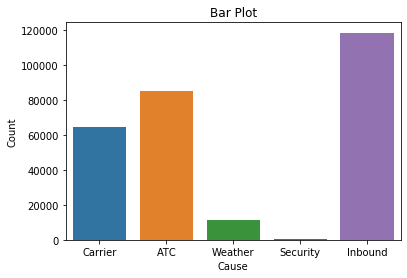

In [ ]:
sns.barplot(x='Cause', y='Count', data=dfw_transpose)
plt.xlabel('Cause')
plt.ylabel('Count')
plt.title('Bar Plot')
plt.show()

### **Pie chart**:
Pie charts are an alternative to bar charts

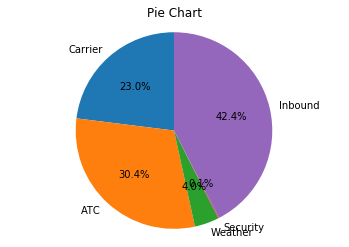

In [ ]:
# Assuming 'dfw_transpose' is a DataFrame with 'Cause' and 'Count' columns
plt.pie(dfw_transpose['Count'], labels=dfw_transpose['Cause'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title('Pie Chart')
plt.show()

### **Moda:**
The mode is the value—or values in case of a tie—that appears most often in the data. The mode is a simple summary statistic for
categorical data, and it is generally not used for numeric data

In [ ]:
lista = ['a','b','b','d','b']
stats.mode(lista)

ModeResult(mode=array(['b'], dtype='<U1'), count=array([3]))

### **Expected value:**
A special type of categorical data is data in which the categories represent or can be
mapped to discrete values on the same scale

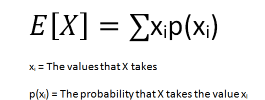

A marketer for a new cloud technology,
for example, offers two levels of service, one priced at 300 dollars at month and another at
50 dollars at month. The marketer offers free webinars to generate leads, and the firm figures
that 5% of the attendees will sign up for the 300 dollars service, 15 percent will sign up for the $50
service, and 80% will not sign up for anything. This data can be summed up, for
financial purposes, in a single “expected value,” which is a form of weighted mean, in
which the weights are probabilities.

image.png

---
---
## **Correlation:**

Variables X and Y (each with measured data) are said to be positively
correlated if high values of X go with high values of Y, and low values of X go
with low values of Y. If high values of X go with low values of Y, and vice versa, the
variables are negatively correlated.

In [ ]:
sp500_px = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/dfw_airline.csv')
sp500_px.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


### **Coefficente correlazione:**
a metric that measures the extent to which numeric variables are associated with
one another (ranges from –1 to +1). For example the "Pearson’s correlation coefficient"

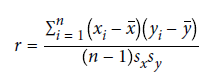

The correlation coefficient is a standardized metric, so that it always ranges from
–1 (perfect negative correlation) to +1 (perfect positive correlation).

A correlation coefficient of zero indicates no correlation, but be aware that random
arrangements of data will produce both positive and negative values for the
correlation coefficient just by chance.

### **Correlation matrix**
A table where the variables are shown on both rows and columns, and the cell
values are the correlations between the variables.

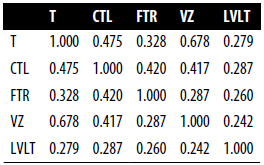



### **Scatterplot**
A plot in which the x-axis is the value of one variable, and the y-axis the value of
another.

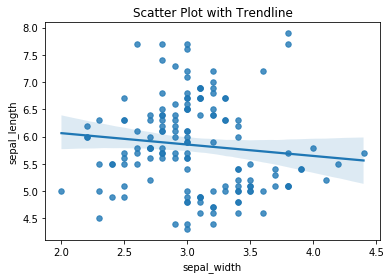

In [ ]:
sns.regplot(x='sepal_width', y='sepal_length', data=df, scatter_kws={'s': 30})
plt.title('Scatter Plot with Trendline')
plt.show()

---
---
## **Analisi multivariabile**

Like univariate analysis, bivariate analysis involves both computing summary statistics
and producing visual displays.


**Hexagonal Binning and Contours**

For data sets with hundreds
of thousands or millions of records, a scatterplot will be too dense, so we need a
different way to visualize the relationship

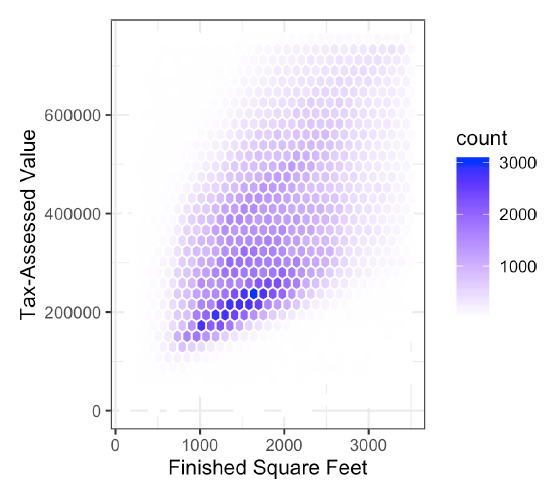

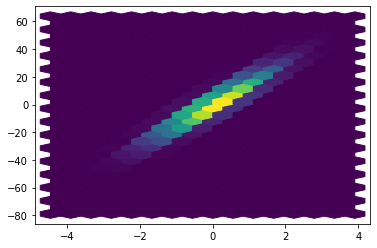

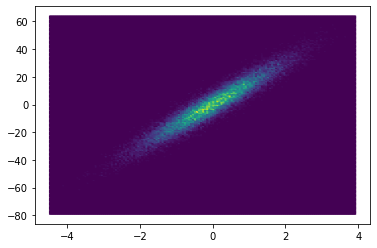

In [ ]:
# create data
x = np.random.normal(size=50000)
y = (x * 3 + np.random.normal(size=50000)) * 5

# Make the plot
plt.hexbin(x, y, gridsize=(15,15) )
plt.show()

# We can control the size of the bins:
plt.hexbin(x, y, gridsize=(150,150) )
plt.show()

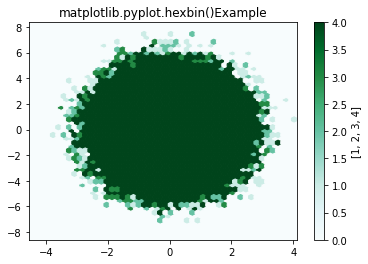

In [ ]:
np.random.seed(19680801)

n = 100000
x = np.random.standard_normal(n)
y = 2 * np.random.standard_normal(n)
z =[1, 2, 3, 4]
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

hb = plt.hexbin(x, y, gridsize = 50,
               bins = z, cmap ='BuGn')

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

cb = plt.colorbar(hb)
cb.set_label(z)
plt.title('matplotlib.pyplot.hexbin()\
Example')

plt.show()

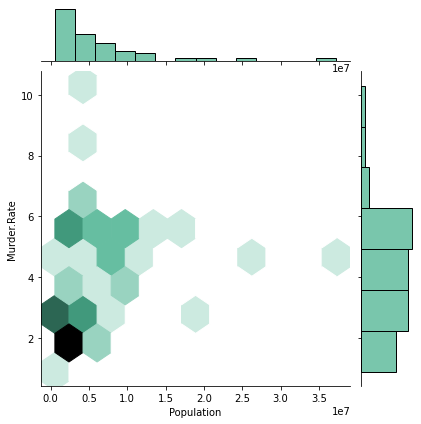

In [ ]:
sns.jointplot(data = state, x="Population", y="Murder.Rate", kind="hex", color="#4CB391")

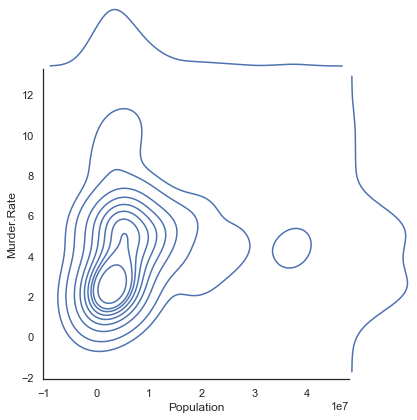

In [ ]:
# Assuming 'state' is a DataFrame with 'Population' and 'Murder.Rate' columns
sns.set(style="white", color_codes=True)
g = sns.jointplot(x="Population", y="Murder.Rate", data=state, kind="kde", space=0, color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")

# Add histograms manually with specified bins
plt.hist(state["Population"], bins=10, alpha=0.5, color='b', density=True, orientation='vertical')
g.ax_marg_x.set_axis_off()

plt.hist(state["Murder.Rate"], bins=10, alpha=0.5, color='b', density=True, orientation='horizontal')
g.ax_marg_y.set_axis_off()

plt.show()

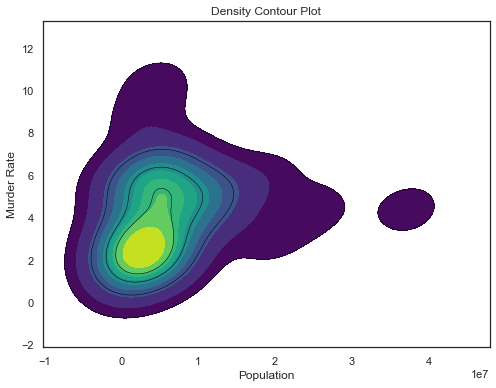

In [ ]:
# Assuming 'state' is a DataFrame with 'Population' and 'Murder.Rate' columns
sns.set(style="white")
plt.figure(figsize=(8, 6))

# Create a filled contour plot
sns.kdeplot(x="Population", y="Murder.Rate", data=state, fill=True, cmap="viridis")

# Add contour labels
sns.kdeplot(x="Population", y="Murder.Rate", data=state, levels=5, colors="black", linewidths=0.5)

plt.xlabel("Population")
plt.ylabel("Murder Rate")
plt.title("Density Contour Plot")
plt.show()

## **Analisi due variabili categoriche**:

A useful way to summarize two categorical variables is a **contingency table**—a table of
counts by category

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/lc_loans.csv')
data.head(10)

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
5,Fully Paid,A
6,Current,C
7,Fully Paid,E
8,Charged Off,F
9,Charged Off,B


### **tabella a doppia entrata**
 è una tabella che mostra la frequenza di occorrenza di due o più variabili. È un modo utile per visualizzare la relazione tra due o più variabili.

Una crosstab è costituita da due o più colonne, ognuna delle quali rappresenta una variabile. Ogni riga della tabella rappresenta un valore possibile per una delle variabili. La cella all'intersezione di una colonna e una riga mostra il numero di casi che hanno il valore della colonna e il valore della riga.

Ad esempio, una crosstab potrebbe essere utilizzata per mostrare la relazione tra il sesso e il colore dei capelli in un gruppo di persone. La tabella avrebbe due colonne, una per il sesso e una per il colore dei capelli. Ogni riga della tabella rappresenterebbe una persona. La cella all'intersezione della colonna "sesso" e della riga "uomo" mostrerebbe il numero di uomini con i capelli neri.

In [ ]:
data_crosstab = pd.crosstab(data['grade'], data['status'], margins = False)
data_crosstab

status,Charged Off,Current,Fully Paid,Late
grade,,,,
A,1562,50051,20408,469
B,5302,93852,31160,2056
C,6023,88928,23147,2777
D,5007,53281,13681,2308
E,2842,24639,5949,1374
F,1526,8444,2328,606
G,409,1990,643,199


##**Analisi dati numerici e categorici congiunti**

Boxplots are a simple way to visually
compare the distributions of a numeric variable grouped according to a categorical
variable.

In [ ]:
airline = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/airline_stats.csv')
airline.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


### Boxplot

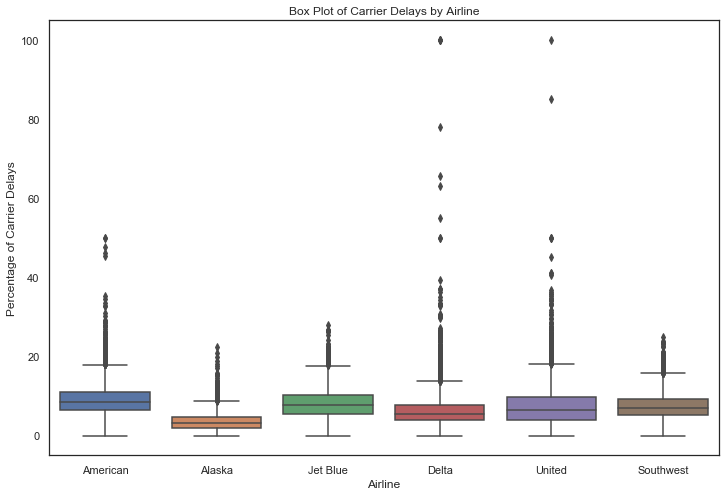

In [ ]:
plt.figure(figsize=(12, 8))

# Create a box plot
sns.boxplot(x='airline', y='pct_carrier_delay', data=airline)

plt.xlabel('Airline')
plt.ylabel('Percentage of Carrier Delays')
plt.title('Box Plot of Carrier Delays by Airline')
plt.show()

### **Violin plot:**

is an enhancement to the boxplot
and plots the density estimate with the density on the y-axis. The density is mirrored
and flipped over, and the resulting shape is filled in, creating an image resembling a
violin. The advantage of a violin plot is that it can show nuances in the distribution
that aren’t perceptible in a boxplot. On the other hand, the boxplot more clearly
shows the outliers in the data.

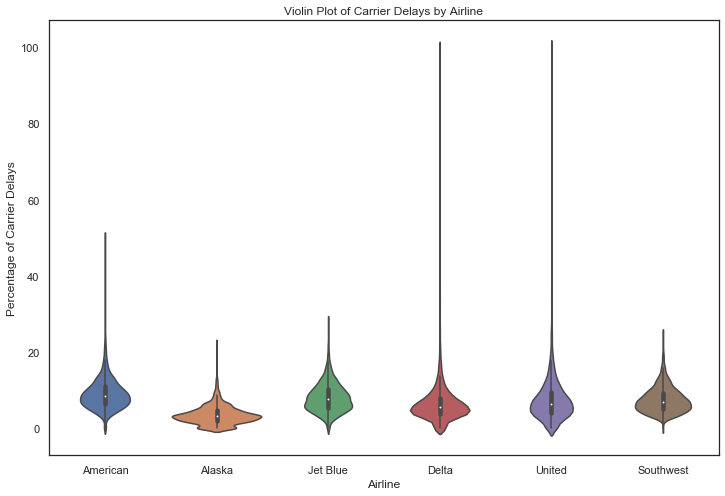

In [ ]:
plt.figure(figsize=(12, 8))

# Create a violin plot
sns.violinplot(x='airline', y='pct_carrier_delay', data=airline)

plt.xlabel('Airline')
plt.ylabel('Percentage of Carrier Delays')
plt.title('Violin Plot of Carrier Delays by Airline')
plt.show()

### **Visualizing Multiple Variables:**

In [ ]:
kc_tax = pd.read_csv('kc_tax.csv')
kc_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730.0,98117.0
1,206000.0,1870.0,98002.0
2,303000.0,1530.0,98166.0
3,361000.0,2000.0,98108.0
4,459000.0,3150.0,98108.0


In [ ]:
kc_tax_1 = kc_tax.iloc[1:30,:]

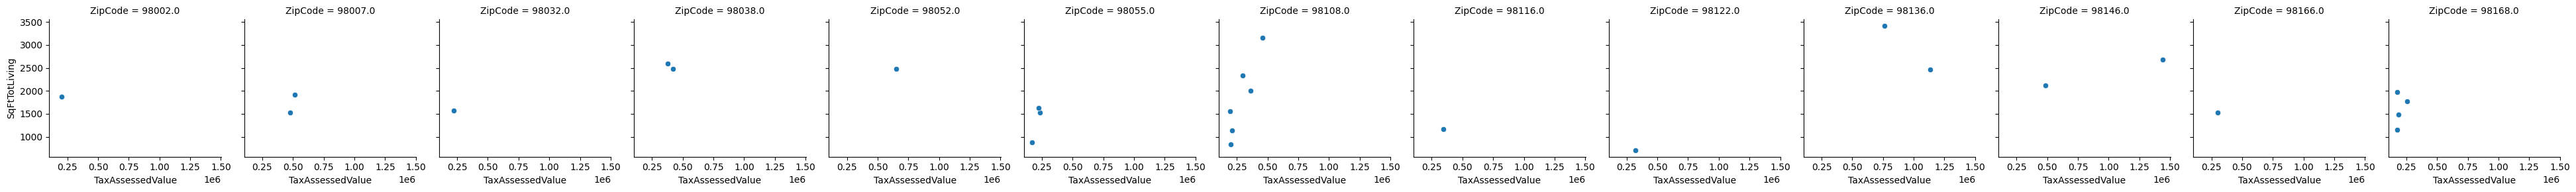

In [ ]:
g = sns.FacetGrid(kc_tax_1 , col="ZipCode")
g.map(sns.scatterplot, "TaxAssessedValue", "SqFtTotLiving")


The more
iterations you do, the more accurate the estimate of the standard error, or the confidence
interval. The result from this procedure is a bootstrap set of sample statistics or
estimated model parameters, which you can then examine to see how variable they
are.